## Load a GeoTiff file from a non-seachable STAC catalog
### A DeepESDL example notebook 

This notebook demonstrates how to load a GeoTIFF file from a non-searchable STAC catalog via xcube-stac store. The data in the example is fetchedthe [EcoDataCube.eu](https://stac.ecodatacube.eu/) STAC catalog.

A non-searchable catalog does not implement the [STAC API - Item Search](https://github.com/radiantearth/stac-api-spec/tree/release/v1.0.0/item-search) conformance class. When searching in such type of catalog, the catalog needs to be crawled through and the items properties needs to be matched to the search parameters. This process can be slow, especially for large catalogs.

**For more example notebooks using xcube-stac, please head over to GitHub https://github.com/xcube-dev/xcube-stac/tree/main/examples/notebooks. There you can find examples like leading GeoTiffs and netCDFs from searchable STAC-Catalogs.**

Please, also refer to the [DeepESDL documentation](https://earthsystemdatalab.net/guide/jupyterlab) and visit the platform's [website](https://www.earthsystemdatalab.net/) for further information!

Brockmann Consult, 2025

-----------------

**This notebook runs with the python environment `users-deepesdl-xcube-1.11.0`, please checkout the documentation for [help on changing the environment](https://earthsystemdatalab.net/guide/jupyterlab/#python-environment-selection-of-the-jupyter-kernel).**

In [1]:
%%time
from xcube.core.store import new_data_store, get_data_store_params_schema
import itertools

CPU times: user 1.91 s, sys: 325 ms, total: 2.23 s
Wall time: 2.65 s


First, we get the store parameters needed to initialize a STAC [data store](https://xcube.readthedocs.io/en/latest/dataaccess.html#data-store-framework). 

In [2]:
get_data_store_params_schema("stac")

We determine the url of the [EcoDataCube.eu](https://stac.ecodatacube.eu/) STAC catalog and initiate a STAC [data store](https://xcube.readthedocs.io/en/latest/dataaccess.html#data-store-framework) where the `xcube-stac` plugin is recognized by setting the first argument to `"stac"` in the `new_data_store` function.

In [3]:
%%time
url = "https://s3.eu-central-1.wasabisys.com/stac/odse/catalog.json"
store = new_data_store("stac", url=url)

CPU times: user 14.2 ms, sys: 8.12 ms, total: 22.4 ms
Wall time: 183 ms


/home/conda/users/19e33cc7-1749710901-48-deepesdl-xcube-1.11.0/lib/python3.12/site-packages/pystac_client/client.py:186: NoConformsTo: Server does not advertise any conformance classes.
  warnings.warn(NoConformsTo())


The data IDs point to a [STAC item's JSON](https://github.com/radiantearth/stac-spec/blob/master/item-spec/item-spec.md) and are specified by the segment of the URL that follows the catalog's URL. The data IDs can be streamed using the following code where we show the first 10 data IDs as an example.

In [4]:
%%time
data_ids = store.get_data_ids()
list(itertools.islice(data_ids, 10))

CPU times: user 566 ms, sys: 84.3 ms, total: 650 ms
Wall time: 17.5 s


['accum.precipitation_chelsa.montlhy/accum.precipitation_chelsa.montlhy_20000101_20000131/accum.precipitation_chelsa.montlhy_20000101_20000131.json',
 'accum.precipitation_chelsa.montlhy/accum.precipitation_chelsa.montlhy_20000201_20000228/accum.precipitation_chelsa.montlhy_20000201_20000228.json',
 'accum.precipitation_chelsa.montlhy/accum.precipitation_chelsa.montlhy_20000301_20000331/accum.precipitation_chelsa.montlhy_20000301_20000331.json',
 'accum.precipitation_chelsa.montlhy/accum.precipitation_chelsa.montlhy_20000401_20000430/accum.precipitation_chelsa.montlhy_20000401_20000430.json',
 'accum.precipitation_chelsa.montlhy/accum.precipitation_chelsa.montlhy_20000501_20000531/accum.precipitation_chelsa.montlhy_20000501_20000531.json',
 'accum.precipitation_chelsa.montlhy/accum.precipitation_chelsa.montlhy_20000601_20000630/accum.precipitation_chelsa.montlhy_20000601_20000630.json',
 'accum.precipitation_chelsa.montlhy/accum.precipitation_chelsa.montlhy_20000701_20000731/accum.prec

In the next step, we can search for items using search parameters. The following code shows which search parameters are available.

In [5]:
%%time
search_params = store.get_search_params_schema()
search_params

CPU times: user 34 μs, sys: 0 ns, total: 34 μs
Wall time: 36.5 μs


Now, let's search for Topographic Wetness Index generated by the Ensemble Digital Terrain Model by Whitbox Workflow for the European region during the first quarter of 2010.

In [6]:
%%time
descriptors = list(
    store.search_data(
        collections=["twi_edtm"],
        bbox=[-10, 40, 40, 70],
        time_range=["2010-01-01", "2010-04-01"],
    )
)
[d.to_dict() for d in descriptors]

CPU times: user 17.6 ms, sys: 3.18 ms, total: 20.7 ms
Wall time: 249 ms


[{'data_id': 'twi_edtm/twi_edtm_20060101_20151231/twi_edtm_20060101_20151231.json',
  'data_type': 'dataset',
  'bbox': [-56.51881139294227,
   24.275788389340878,
   72.93153043046625,
   72.64259665547773],
  'time_range': ('2006-01-01', '2015-12-31')}]

In the next step, we can open the data for each data ID. The following code shows which parameters are available for opening the data.

In [7]:
%%time
open_params = store.get_open_data_params_schema()
open_params

CPU times: user 30 μs, sys: 6 μs, total: 36 μs
Wall time: 38.1 μs


Now, we open the data for a given data ID, where we select all available assets, which can be opened by the data store. Note that we assign `data_type` to get an `xarray.Dataset` as return value. 

In [10]:
%%time
ds = store.open_data(descriptors[0].data_id, data_type="dataset")
ds

CPU times: user 382 ms, sys: 48 ms, total: 430 ms
Wall time: 1.05 s


<xarray.Dataset> Size: 66GB
Dimensions:           (x: 216700, y: 153400)
Coordinates:
  * x                 (x) float64 2MB 9e+05 9e+05 ... 7.401e+06 7.401e+06
  * y                 (y) float64 1MB 5.501e+06 5.501e+06 ... 8.99e+05 8.99e+05
    spatial_ref       int64 8B 0
Data variables:
    twi_edtm_m_30m_s  (y, x) int16 66GB dask.array<chunksize=(512, 512), meta=np.ndarray>
Attributes:
    stac_catalog_url:  https://s3.eu-central-1.wasabisys.com/stac/odse/catalo...
    stac_item_id:      twi_edtm_20060101_20151231

We plot the loaded data as an example below.

CPU times: user 3.88 s, sys: 1.05 s, total: 4.93 s
Wall time: 18.3 s


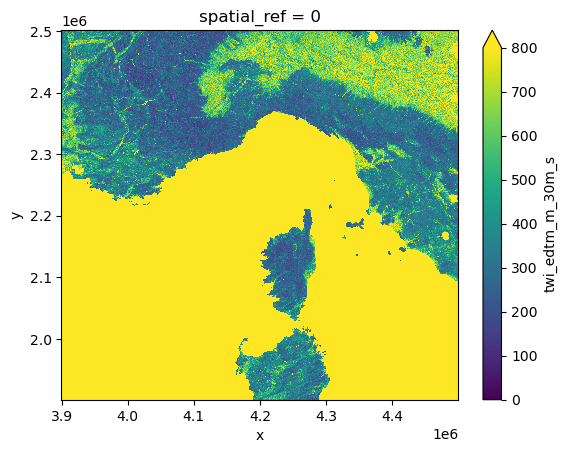

In [11]:
%%time
ds.twi_edtm_m_30m_s[100000:120000:20, 100000:120000:20].plot(vmin=0, vmax=800)

We can also open a GeoTIFF as a [xcube's multi-resolution  dataset](https://xcube.readthedocs.io/en/latest/mldatasets.html#xcube-multi-resolution-datasets), where we can select the level of resolution, shown below.

In [12]:
%%time
mlds = store.open_data(descriptors[0].data_id, data_type="mldataset")
mlds.num_levels

CPU times: user 18.1 ms, sys: 1.13 ms, total: 19.2 ms
Wall time: 490 ms


8

In [13]:
ds = mlds.get_dataset(5)
ds

<xarray.Dataset> Size: 65MB
Dimensions:           (x: 6771, y: 4793)
Coordinates:
  * x                 (x) float64 54kB 9.005e+05 9.014e+05 ... 7.4e+06 7.401e+06
  * y                 (y) float64 38kB 5.501e+06 5.5e+06 ... 9.004e+05 8.995e+05
    spatial_ref       int64 8B 0
Data variables:
    twi_edtm_m_30m_s  (y, x) int16 65MB dask.array<chunksize=(512, 512), meta=np.ndarray>
Attributes:
    stac_catalog_url:  https://s3.eu-central-1.wasabisys.com/stac/odse/catalo...
    stac_item_id:      twi_edtm_20060101_20151231

CPU times: user 84.7 ms, sys: 7.57 ms, total: 92.3 ms
Wall time: 394 ms


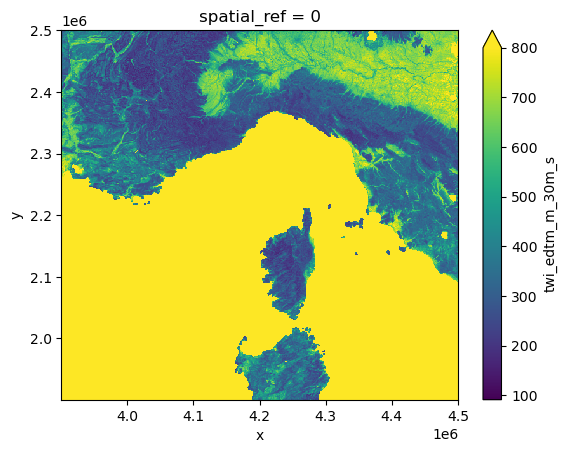

In [14]:
%%time
ds.twi_edtm_m_30m_s[3125:3750, 3125:3750].plot(vmax=800)